In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Problem 1

In [2]:
df1_1 = pd.read_excel('data_raw.xls', sheet_name = 0)
df1_2 = pd.read_excel('data_raw.xls', sheet_name = 1)
df1_3 = pd.read_excel('data_raw.xls', sheet_name = "Performance & Volatility")
df1_4 = pd.read_excel('data_raw.xls', sheet_name = "Valuation, Growth & Ownership")

df1 = pd.concat([df1_1, df1_2, df1_3, df1_4], axis = 1)
print(df1)

     Symbol                 Company Name Security Type  Security Price  \
0       VHI                   Valhi Inc.  Common Stock           32.01   
1      HCCI   Heritage-Crystal Clean Inc  Common Stock           26.82   
2       MMI       Marcus & Millichap Inc  Common Stock           44.81   
3      TMST             TimkenSteel Corp  Common Stock           19.65   
4      SRTS        Sensus Healthcare Inc  Common Stock            7.41   
...     ...                          ...           ...             ...   
3056   AKYA        Akoya Biosciences Inc  Common Stock           11.32   
3057   NPCE                Neuropace Inc  Common Stock            6.56   
3058   TMCI  Treace Medical Concepts Inc  Common Stock           19.62   
3059   RXST                  RxSight Inc  Common Stock           11.84   
3060   PRCT     PROCEPT BioRobotics Corp  Common Stock           38.00   

      Equity Summary Score Symbol                 Company Name  \
0                     10.0    VHI            

In [3]:
df1.shape

(3061, 32)

In [4]:
df1 = df1.loc[:,~df1.columns.duplicated()]

In [5]:
df1.shape

(3061, 25)

In [6]:
df1['Dividend Yield'].isnull().sum()

1524

In [7]:
df1['Dividend Yield'] = df1['Dividend Yield'].fillna(0.00)
df1['Dividend Yield'].isnull().sum()

0

In [8]:
df1['Market Capitalization']

0       $905.15M
1       $649.10M
2         $1.78B
3       $911.41M
4       $123.58M
          ...   
3056    $388.59M
3057    $176.49M
3058      $1.08B
3059    $331.21M
3060      $1.64B
Name: Market Capitalization, Length: 3061, dtype: object

In [9]:
df1['Market Capitalization'] = df1['Market Capitalization'].replace({'\$':''}, regex = True)
df1['Market Capitalization']

0       905.15M
1       649.10M
2         1.78B
3       911.41M
4       123.58M
         ...   
3056    388.59M
3057    176.49M
3058      1.08B
3059    331.21M
3060      1.64B
Name: Market Capitalization, Length: 3061, dtype: object

In [10]:
df1['Market Capitalization'] = df1['Market Capitalization'].replace({"K":"*1e3", "M":"*1e6", "B":"*1e9", "T":"*1e12"}, regex=True).map(pd.eval).astype(float)
df1['Market Capitalization']

0       9.051500e+08
1       6.491000e+08
2       1.780000e+09
3       9.114100e+08
4       1.235800e+08
            ...     
3056    3.885900e+08
3057    1.764900e+08
3058    1.080000e+09
3059    3.312100e+08
3060    1.640000e+09
Name: Market Capitalization, Length: 3061, dtype: float64

In [11]:
df1["Equity Summary Score"]

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
3056     0.1
3057     0.1
3058     0.1
3059     0.1
3060     0.1
Name: Equity Summary Score, Length: 3061, dtype: float64

In [12]:
def change_func(x):
    if 0.1 <= x <= 1.0:
        return "very bullish"
    elif 1.1 <= x <= 3.0:
        return "bearish"
    elif 3.1 <= x <= 7.0:
        return "neutral"
    elif 7.1 <= x <= 9.0:
        return "bullish"
    elif 9.1 <= x <= 10.0:
        return "very bullish"

In [13]:
df1["Analyst Sentiment"] = df1["Equity Summary Score"].apply(lambda x: change_func(x))
df1["Analyst Sentiment"]

0       very bullish
1       very bullish
2       very bullish
3       very bullish
4       very bullish
            ...     
3056    very bullish
3057    very bullish
3058    very bullish
3059    very bullish
3060    very bullish
Name: Analyst Sentiment, Length: 3061, dtype: object

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Symbol                                           3061 non-null   object 
 1   Company Name                                     3061 non-null   object 
 2   Security Type                                    3061 non-null   object 
 3   Security Price                                   3061 non-null   float64
 4   Equity Summary Score                             3061 non-null   float64
 5   Volume (90 Day Avg)                              3057 non-null   float64
 6   Market Capitalization                            3061 non-null   float64
 7   Dividend Yield                                   3061 non-null   float64
 8   Company Headquarters Location                    3061 non-null   object 
 9   Sector                        

In [15]:
df1_sanity = pd.read_csv('data_prepared.csv')

In [16]:
df1_sanity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       3061 non-null   int64  
 1   Symbol                                           3061 non-null   object 
 2   Company Name                                     3061 non-null   object 
 3   Security Type                                    3061 non-null   object 
 4   Security Price                                   3061 non-null   float64
 5   Equity Summary Score                             3061 non-null   float64
 6   Volume (90 Day Avg)                              3057 non-null   float64
 7   Market Capitalization                            3061 non-null   int64  
 8   Dividend Yield                                   3061 non-null   float64
 9   Company Headquarters Location 

In [17]:
df1_sanity.isnull().sum()

Unnamed: 0                                            0
Symbol                                                0
Company Name                                          0
Security Type                                         0
Security Price                                        0
Equity Summary Score                                  0
Volume (90 Day Avg)                                   4
Market Capitalization                                 0
Dividend Yield                                        0
Company Headquarters Location                         0
Sector                                                1
Industry                                              1
Optionable                                            0
Price Performance (52 Weeks)                         73
Total Return (1 Yr Annualized)                       73
Beta (1 Year Annualized)                             73
Standard Deviation (1 Yr Annualized)                 71
S&P Global Market Intelligence Valuation        

In [18]:
df1.isnull().sum()

Symbol                                                0
Company Name                                          0
Security Type                                         0
Security Price                                        0
Equity Summary Score                                  0
Volume (90 Day Avg)                                   4
Market Capitalization                                 0
Dividend Yield                                        0
Company Headquarters Location                         0
Sector                                                1
Industry                                              1
Optionable                                            0
Price Performance (52 Weeks)                         73
Total Return (1 Yr Annualized)                       73
Beta (1 Year Annualized)                             73
Standard Deviation (1 Yr Annualized)                 71
S&P Global Market Intelligence Valuation             14
S&P Global Market Intelligence Quality          

### Problem 2

In [19]:
#Reading data file
df2 = pd.read_csv('data_prepared.csv')

In [20]:
df2 = df2.loc[df2['Security Type'] == 'Common Stock']

In [21]:
df2 = df2.dropna()

In [22]:
#Select appropriate features
features = ["Security Price", "Volume (90 Day Avg)", "Market Capitalization", "Dividend Yield", "Total Return (1 Yr Annualized)", "Beta (1 Year Annualized)", "Standard Deviation (1 Yr Annualized)", "S&P Global Market Intelligence Valuation", "S&P Global Market Intelligence Quality", "S&P Global Market Intelligence Growth Stability", "S&P Global Market Intelligence Financial Health", "Institutional Ownership", "Institutional Ownership (Last vs. Prior Qtr)"]

X = df2.copy()
y = X.pop('Analyst Sentiment')
X = X.loc[:, features]

In [23]:
y.value_counts()

neutral         289
bearish         175
bullish         149
very bullish     68
very bearish     45
Name: Analyst Sentiment, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
error_rate = 1 - (1/10)*np.sum(accuracy)
print('Cross-validation error rate:{}'.format(error_rate))

Cross-validation error rate:0.6199771689497717


In [25]:
# 10-Fold Cross Validation
def cross_validation_clas (df, func):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 10, shuffle = True, random_state = 10)
    kf_accuracy = []
    
    for train, test in kf.split(df):
        X_train = df.iloc[train].loc[:, df.columns != 'Analyst Sentiment']
        X_train = X_train.squeeze()
        X_test = df.iloc[test].loc[:, df.columns != 'Analyst Sentiment']
        y_train = df.iloc[train].loc[:,'Analyst Sentiment']
        y_test = df.iloc[test].loc[:,'Analyst Sentiment']
        
        reg = func.fit(X_train, y_train)
        y_hat = reg.predict(X_test)
        
        from sklearn.metrics import accuracy_score
        kf_accuracy.append(accuracy_score(y_test, y_hat))
                
    kf_ACCURACY = (1/10) * np.sum(kf_accuracy)
        
    return (kf_ACCURACY)

In [26]:
df2_2 = pd.concat([X, y], axis = 1)
model_cv_accuracy = cross_validation_clas(df2_2, LogisticRegression())
1-model_cv_accuracy

0.6018835616438356

### Problem 3

In [27]:
#Reading data file
df3 = pd.read_csv('data_prepared.csv')

In [28]:
df3 = df3.loc[df3['Security Type'] == 'Common Stock']

In [29]:
df3 = df3.dropna()

In [30]:
#Select appropriate features
features3 = ["Security Price", "Volume (90 Day Avg)", "Market Capitalization", "Dividend Yield", "Total Return (1 Yr Annualized)", "Beta (1 Year Annualized)", "Standard Deviation (1 Yr Annualized)", "S&P Global Market Intelligence Valuation", "S&P Global Market Intelligence Quality", "S&P Global Market Intelligence Growth Stability", "S&P Global Market Intelligence Financial Health", "Institutional Ownership", "Institutional Ownership (Last vs. Prior Qtr)"]

X3 = df3.copy()
y3 = X3.pop('Equity Summary Score')
X3 = X3.loc[:, features3]

# Standardize
X3_scaled = (X3 - X3.mean(axis=0)) / X3.std(axis=0)

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_s = PCA().fit(StandardScaler().fit_transform(X3)) 
pca_s.components_

array([[-3.82945293e-02, -1.06459373e-01, -9.93556736e-02,
         2.04309002e-01, -5.52529672e-02, -2.10848575e-01,
        -1.84345810e-01, -5.59222000e-01, -4.93120014e-01,
        -2.48923782e-01, -4.65112777e-01, -9.72633414e-02,
         1.02191622e-01],
       [ 7.82242861e-02, -1.97747063e-01, -1.75788512e-01,
        -4.33439610e-01, -2.81397526e-01,  5.21983071e-01,
         4.78283172e-01, -1.27739192e-01, -1.72179913e-01,
        -7.56572924e-02, -1.75876549e-01,  2.66303947e-01,
         4.54122661e-02],
       [ 3.36246343e-01,  5.13559863e-01,  5.99247148e-01,
        -6.25030957e-02,  1.30461704e-01,  2.19018140e-01,
         1.54610024e-01, -1.84206579e-01, -9.27376646e-02,
         1.85249008e-01, -2.07795344e-01, -2.26383614e-01,
         4.40928826e-03],
       [ 6.32863149e-01, -3.21623966e-01,  1.66448110e-01,
        -2.48884601e-01,  3.98851355e-02, -1.78550199e-01,
        -3.96651875e-01, -3.46370708e-02,  1.77353986e-01,
         2.39949629e-02, -1.40112653e

#### Part a

In [32]:
# plotting variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

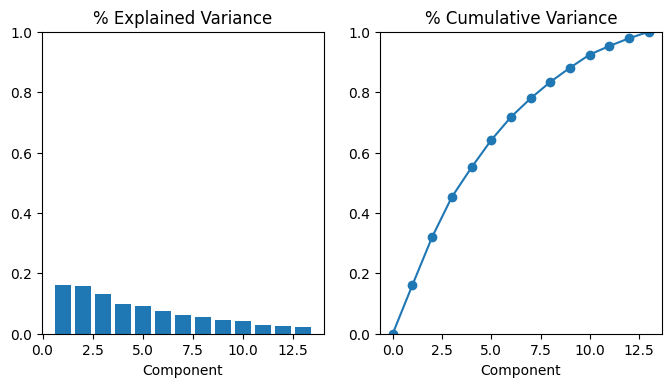

In [33]:
# Look at explained variance
plot_variance(pca_s);

#### Part b

In [34]:
# 10-Fold Cross Validation
def cross_validation (df, func):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 10, shuffle = True, random_state = 10)
    kf_rmse = []
    
    for train, test in kf.split(df):
        X_train = df.iloc[train].loc[:, df.columns != 'Equity Summary Score']
        X_train = X_train.squeeze()
        X_test = df.iloc[test].loc[:, df.columns != 'Equity Summary Score']
        y_train = df.iloc[train].loc[:,'Equity Summary Score']
        y_test = df.iloc[test].loc[:,'Equity Summary Score']
        
        reg = func.fit(X_train, y_train)
        y_hat = reg.predict(X_test)
        
        from sklearn.metrics import mean_squared_error
        kf_rmse.append(mean_squared_error(y_test, y_hat, squared=False))
        
    kf_RMSE = (1/10) * np.sum(kf_rmse)
        
    return (kf_RMSE)

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

mse3 = []

df_3 = pd.concat([X3_scaled, y3], axis = 1)

for i in range(1,14,1):
    reg = make_pipeline(PCA(n_components=i), LinearRegression()).fit(X3_scaled, y3)
    y_hat = reg.predict(X3_scaled)
    mse3.append(cross_validation(df_3,make_pipeline(PCA(n_components=i), LinearRegression())))

In [36]:
rmse_PCR = pd.DataFrame(zip(np.linspace(1,len(mse3),len(mse3)), mse3), columns = ['PC','rmse'])
rmse_PCR.loc[rmse_PCR['rmse'] == rmse_PCR['rmse'].min()]

,PC,rmse
11,12.0,2.159135


#### Part b1

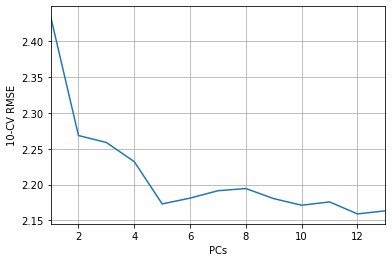

In [37]:
x = rmse_PCR['PC']
y = rmse_PCR['rmse']

plt.plot(x, y)
plt.xlim(1, 13) 
plt.ylabel('10-CV RMSE')
plt.xlabel('PCs')
plt.grid()
plt.show()

#### Part b2

In [38]:
#The optimal number of PCs to include in the PCR is 12 as it returned the lowest 10-CV RMSE
#However, looking at the cumulated % of variance explained plot, one may find it desirable to select the minimum
#number of PCs that can sufficiently explain the variance in the data (ex. 7 PCs explain 80% of the variance)

#### Part b3

In [39]:
# PCA
from sklearn.preprocessing import StandardScaler

pca_s2 = PCA(n_components = 12).fit(StandardScaler().fit_transform(X3))    
print('PC_s\n', pca_s2.components_)  # each row is a PC

PC_s
 [[-3.82945293e-02 -1.06459373e-01 -9.93556736e-02  2.04309002e-01
  -5.52529672e-02 -2.10848575e-01 -1.84345810e-01 -5.59222000e-01
  -4.93120014e-01 -2.48923782e-01 -4.65112777e-01 -9.72633414e-02
   1.02191622e-01]
 [ 7.82242861e-02 -1.97747063e-01 -1.75788512e-01 -4.33439610e-01
  -2.81397526e-01  5.21983071e-01  4.78283172e-01 -1.27739192e-01
  -1.72179913e-01 -7.56572924e-02 -1.75876549e-01  2.66303947e-01
   4.54122661e-02]
 [ 3.36246343e-01  5.13559863e-01  5.99247148e-01 -6.25030957e-02
   1.30461704e-01  2.19018140e-01  1.54610024e-01 -1.84206579e-01
  -9.27376646e-02  1.85249008e-01 -2.07795344e-01 -2.26383614e-01
   4.40928826e-03]
 [ 6.32863149e-01 -3.21623966e-01  1.66448110e-01 -2.48884601e-01
   3.98851355e-02 -1.78550199e-01 -3.96651875e-01 -3.46370708e-02
   1.77353986e-01  2.39949629e-02 -1.40112653e-01  4.02201056e-01
  -3.10300993e-02]
 [-1.01316731e-01 -1.73654112e-01 -2.57122810e-01 -2.32887417e-02
   6.28997982e-01 -6.98235245e-03  1.55944217e-01 -1.5304518